In [247]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt

# 1


Measures the time it takes to compute numbers from 0 to 1 from a uniform distribution using the random and numpy modules.

And then it plots the dependence of the computation time on the number of computed numbers for them.

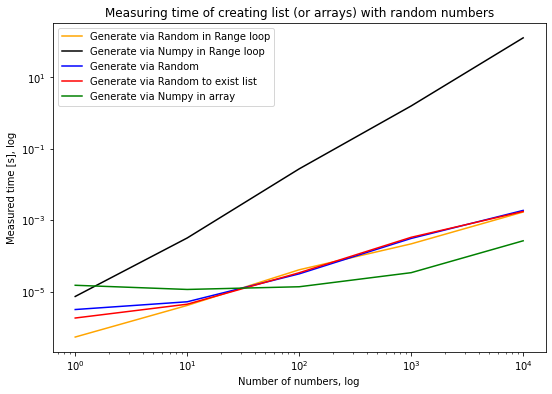

In [222]:
def random_list_timer(number_numbers):
    '''
    Measures time of creating random lists orr arrays.
    For a more accurate calculation, the measurement is repeated 5 rows.
    '''
    end_random_generate, end_random_prelist, end_np = 0, 0, 0
    iters = 5

    for _ in range(iters):
        start_random = timer()
        [random.random() for _ in range(number_numbers)]
        end_random_generate += timer() - start_random

        start_random = timer()
        pre_list = [0] * number_numbers
        for i in range(number_numbers):
            pre_list[i] = random.random()
        end_random_prelist += timer() - start_random

        start_np = timer()
        np.random.uniform(0, 1, number_numbers)
        end_np += timer() - start_np

    return end_random_generate / iters, end_random_prelist / iters, end_np / iters


def random_timer_range(number_numbers):
    '''
    Measures time of creating random numbers in "range" loop.
    For a more accurate calculation, the measurement is repeated 5 rows.
    '''
    end_random_generate, end_np = 0, 0
    iters = 5

    for _ in range(iters):
        inside_random_time, inside_np_time = 0, 0

        for _ in range(number_numbers):
            start_random = timer()
            random.random()
            inside_random_time += (timer() - start_random)
        end_random_generate += inside_random_time

        for _ in range(number_numbers):
            start_np = timer()
            np.random.uniform(0, 1)
            inside_np_time += (timer() - start_random)
        end_np += inside_np_time

    return end_random_generate / iters, end_np / iters


def generate_plot_list():
    '''
    Measures time of generete random list via Random (uses pre-created list and without it) and
    random array via Numpy.
    Also measures time of generete random numbers via Random and via Numpy in 'range' loop.
    Generates plot.
    '''
    timer_random_generate, timer_random_prelist, timer_np = [], [], []
    timer_random_loop, timer_np_loop = [], []
    number_n = [int(i) for i in np.logspace(0, 5, num=5-0, endpoint=False)]

    for n in number_n:
        end_random_generate, end_random_prelist, end_np = random_list_timer(n)
        end_range_random, end_range_np = random_timer_range(n)
        timer_random_generate.append(end_random_generate)
        timer_random_prelist.append(end_random_prelist)
        timer_np.append(end_np)
        timer_random_loop.append(end_range_random)
        timer_np_loop.append(end_range_np)
    
    fig, ax = plt.subplots()
    ax.plot(number_n, timer_random_loop, label='Generate via Random in Range loop', color = 'orange')
    ax.plot(number_n, timer_np_loop, label='Generate via Numpy in Range loop', color = 'black')
    ax.plot(number_n, timer_random_generate, label='Generate via Random', color='blue')
    ax.plot(number_n, timer_random_prelist, label='Generate via Random to exist list', color = 'red')
    ax.plot(number_n, timer_np, label='Generate via Numpy in array', color = 'green')
    plt.title('Measuring time of creating list (or arrays) with random numbers')
    plt.xlabel('Number of numbers, log')
    plt.ylabel('Measured time [s], log')
    plt.tight_layout()
    ax.legend()
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.gcf().set_size_inches(8, 6)
    #plt.savefig('python_homework/random_practice/Plots/random_numbers.png', dpi=100, bbox_inches='tight')
    plt.show()
    plt.close()
    
generate_plot_list()

# 2

Сделайте функцию для проверки является ли список отсортированным (без использования sorted или sort).

Затем реализуйте monkey sort.

Потом визуализируйте следующее: распределение времени работы алгоритма от размера сортируемого списка. То есть по x идёт размер массива, а по y - среднее время нескольких прогонов и их отклонение (или дисперсия).

In [322]:
def is_sorted(list_sort):
    for i in range(len(list_sort) - 1):
        if list_sort[i] <= list_sort[i+1]:
            continue
        else:
            return False
    return True


def monkey_sort(list_sort):
    n = len(list_sort)

    while is_sorted(list_sort) is False:
        random.shuffle(list_sort)
        
    return list_sort


def measure_sort(list_sort):
    end_sort = 0
    iters = 5

    for _ in range(iters):
        start_sort = timer()
        monkey_sort(list_sort)
        end_sort += timer() - start_sort

    return end_sort / iters

def shuff_sort_plot():
    '''
    Measures time of list monkey sort.
    For a more accurate calculation, the measurement is repeated 5 rows.
    '''
    number_n = [i for i in range(1, 20, 1)]
    timer_sort = []
    
    for n in number_n:
        list_sort = [random.randrange(1, 50, 1) for i in range(n)]
        timer_sort.append(measure_sort(list_sort))
    
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.plot(number_n, timer_sort, label='Generate via Random', color='blue')
    plt.title('Measuring time of Monkey sort of List')
    plt.xlabel('List Lenght')
    plt.ylabel('Measured time [s], log')
    #plt.tight_layout()
    #ax.set_yscale('log')
    ax.legend()
    plt.gcf().set_size_inches(8, 6)
    #plt.savefig('python_homework/random_practice/Plots/random_numbers.png', dpi=100, bbox_inches='tight')
    plt.show()
    
shuff_sort_plot()

KeyboardInterrupt: 

# 3

Визуализируйте random walk (случайная прогулка, да)) в 2-мерном пространстве, где вы начинаете в (0, 0) и можете перемещаться вверх, вниз, вправо и влево Как визуализировать - скаттерплот, где по x - x, а по y - y

# 4

Сгенерируйте и нарисуйте треугольник Серпинского, подсказки в прикреплённых ссылках

https://en.wikipedia.org/wiki/Sierpi%C5%84ski_triangle



# 5

Сделайте программу, получающую на вход текст, и выдающую этот же текст со следующими изменениями - буквы во всех словах кроме первой и последней перемешаны. Для простоты пока будем считать, что пунктуации нет. 

Пример: "По рзеузльаттам илссоевадний одонго анлигсйокго унвиертисета, не иеемт занчнеия, в каокм проякде рсапжоолены бкувы в солве. Галовне, чотбы преавя и пслонедяя бквуы блыи на мсете. осатьлыне бкувы мгоут селдовтаь в плоонм бсепордяке, все-рвано ткест чтаитсея без побрелм. Пичрионй эгото ялвятеся то, что мы не чиаетм кдаужю бкуву по отдльенотси, а все солво цлиеком."